In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy.stats import qmc

In [3]:
def f(z, c):
    return z**2 + c

In [50]:

def main(s, max_iter):
    real_min = 0.31
    real_max = 0.38
    im_min = 0.5
    im_max = 0.6

    real_arr = np.random.uniform(real_min, real_max, size=s)
    im_arr = np.random.uniform(im_min, im_max, size=s)

    #Latin = scipy.stats.qmc.LatinHypercube(d = 1)
    #real_arr = (Latin.random(n = s) - 0.5)*(3) - 0.5 
    #im_arr = (Latin.random(n = s) - 0.5)*(3)

    #Ortho = scipy.stats.qmc.LatinHypercube(d = 1, strength=2)
    #real_arr = (Ortho.random(n = s) - 0.5)*(3) - 0.5 
    #im_arr = (Ortho.random(n = s) - 0.5)*(3)
    
    complex_arr = np.zeros(s, dtype=complex)
    for i in range(s):
        complex_arr[i] = complex(real_arr[i], im_arr[i])  

        iterations = []
    for j in range(max_iter):
        iterations.append([])
    
    for c in complex_arr:
        iter = 0
        z = 0
        while abs(z) <= 2 and iter < max_iter:
            z = f(z, c)
            iter += 1

        iterations[iter-1].append(c)

    A = (real_min - real_max) * (im_min - im_max) * len(iterations[max_iter-1]) / s
    print(A)
   
    return iterations, A
    

s = 50000000
max_iter = 750
result = main(s, max_iter)[0]

0.00120888502


In [14]:
# runs main a number of times and finds mean and 95% conf. int.

def loop(run_amount):
    arealist = []
    for i in range(run_amount):
        m = main(s,max_iter)[1]
        arealist.append(m)

    mean_area = np.mean(arealist)
    print("Mean Area = ", mean_area) 
    std = np.std(arealist)  
    differ = 1.96*std/(np.sqrt(run_amount))
    print("1.96*standard error =", differ)
    min_range = mean_area - differ
    max_range = mean_area + differ

    print("range = ", min_range, max_range)

    return arealist, mean_area
  

loop(5)

1.516896
1.5156135
1.5130485
1.5147675
1.515375
Mean Area =  1.5151400999999998
1.96*standard error = 0.0011001235180600317
range =  1.5140399764819397 1.5162402235180599


([1.516896, 1.5156135, 1.5130485, 1.5147675, 1.515375], 1.5151400999999998)

1.608319521
1.6047214200000002
1.6080138000000002
1.611423765
1.60864092
1.5643192140000002
1.564076205
1.563590187
1.564601418
1.563425568
1.548719604
1.550985075
1.54788867
1.5483041370000001
1.548131679
1.540300518
1.542832515
1.538136954
1.535079744
1.537172757
1.5338098260000002
1.538332929
1.5386229720000002
1.538285895
1.5389992440000002
[1.6082238852000004, 1.5640025184, 1.5488058329999999, 1.5387044976, 1.5376101732]


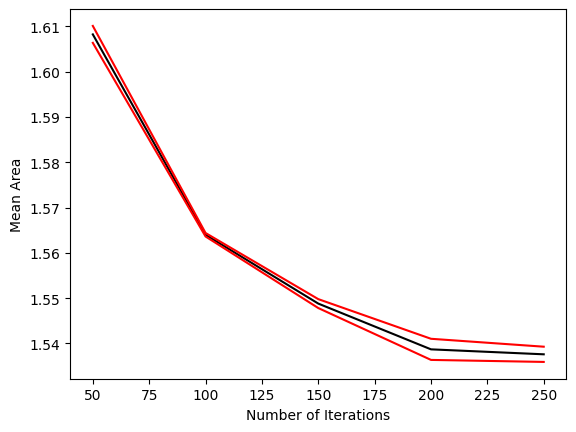

In [9]:
# this function finds the average for different number of max iter (and a fixed number of samples)
# run amount is the amount of runs we will find mean of

def converge_iterations(run_amount, start, end, step):
    difference = []
    upper = []
    lower = []
    for max_iter in range(start, end, step):
        
        s = 500000

        arealist = []
        for i in range(run_amount):
            m = main2(s,max_iter)[1]
            arealist.append(m)

        mean_area = np.mean(arealist)
        diff = mean_area - 0

        std = np.std(arealist)
        error = 1.96*std/(np.sqrt(run_amount))
        min_range = mean_area - error
        max_range = mean_area + error

        difference.append(diff)
        upper.append(min_range)
        lower.append(max_range)
        
    print(difference)


    x = list(range(start, end, step))
    y1 = difference
    y2 = lower
    y3 = upper
    plt.xlabel("Number of Iterations")
    plt.ylabel("Mean Area")
    plt.plot(x, y1, 'k')
    plt.plot(x, y2, 'r')
    plt.plot(x, y3, 'r' )

converge_iterations(5, 50, 300, 50)

1.52649
1.52946
1.5192
1.52451
1.52739
1.51803
1.521675
1.521315
1.52199
1.531755
1.52781
1.52559
1.51452
1.52889
1.52367
1.5333525
1.521945
1.5297975
1.5339825
1.5294825
1.530954
1.533996
1.527156
1.525716
1.522872
[1.5254100000000002, 1.522953, 1.524096, 1.529712, 1.5281388]


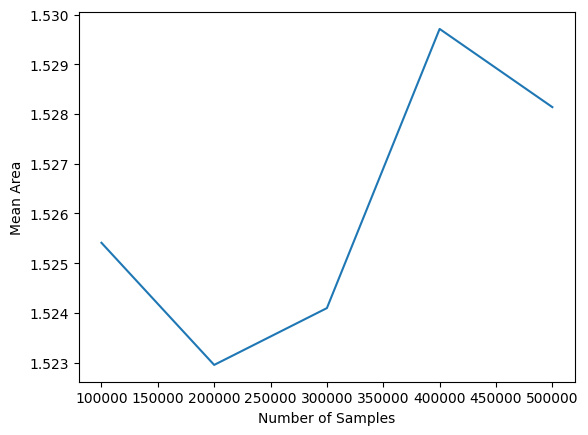

In [ ]:
# Does the same but for a fixed number of iterations and a changing number of sample sizes

def converge_samples(run_amount, start, end, step):
    mean_area_list = []
    upper = []
    lower = []
    for s in range(start, end, step):
        
        max_iter = 200

        arealist = []
        for i in range(run_amount):
            m = main(s,max_iter)[1]
            arealist.append(m)

        mean_area = np.mean(arealist)
        std = np.std(arealist)
        error = 1.96*std/(np.sqrt(run_amount))
        min_range = mean_area - error
        max_range = mean_area + error

        mean_area_list.append(mean_area)
        upper.append(min_range)
        lower.append(max_range)
        
    print(mean_area_list)


    x = list(range(start, end, step))
    y1 = difference
    y2 = lower
    y3 = upper
    plt.xlabel("Number of Samples")
    plt.ylabel("Mean Area")
    plt.plot(x, y1, 'k')
    plt.plot(x, y2, 'r')
    plt.plot(x, y3, 'r' )

converge_samples(5, 100000, 600000, 100000)

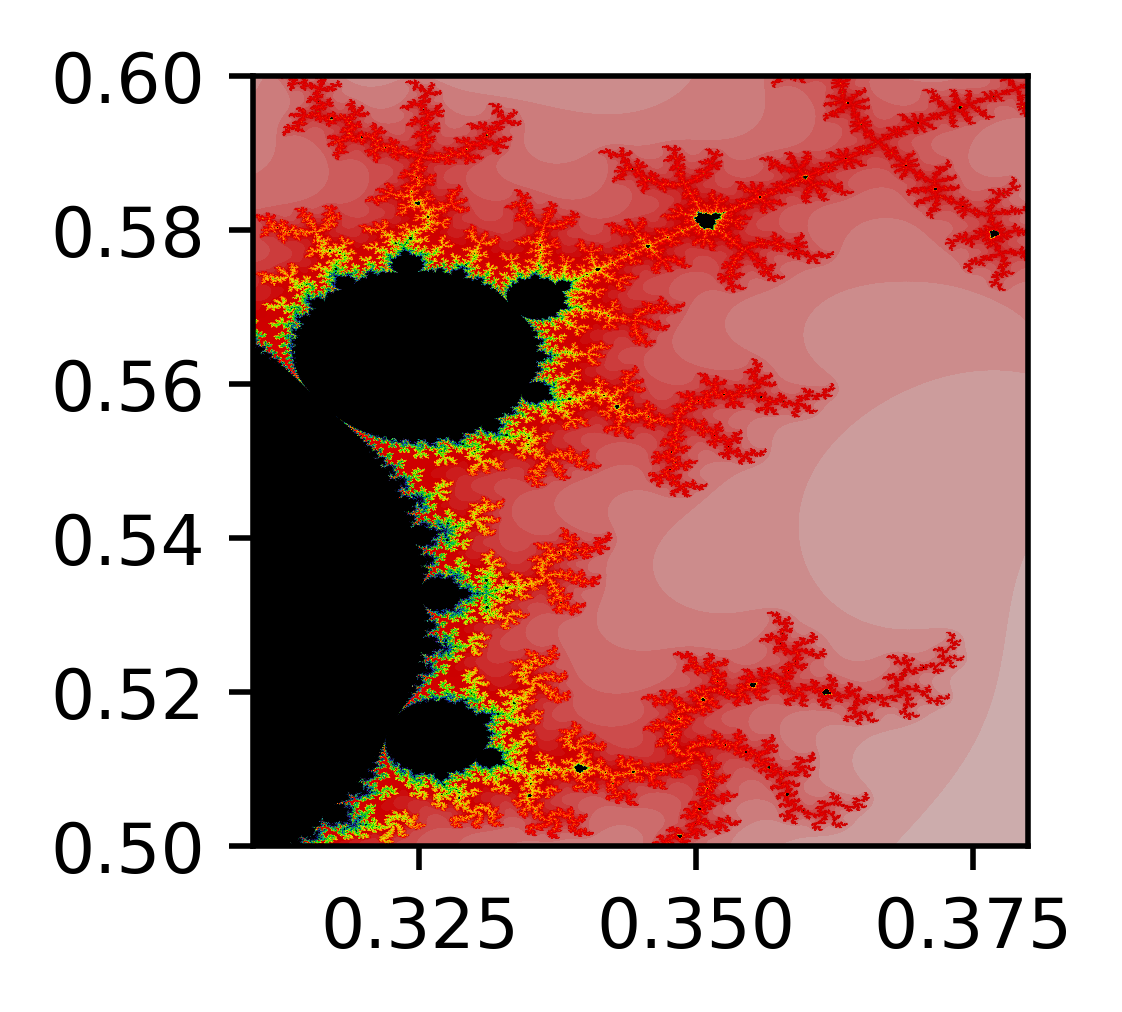

In [51]:

def visualise(data):
    fig = plt.figure(figsize=(2, 2), dpi=500)
    ax = fig.add_subplot(111)

    cmap = plt.cm.nipy_spectral_r
    norm = plt.Normalize(vmin=0, vmax=max_iter)
    plt.ylim(0.5, 0.6)
    plt.xlim(0.31, 0.38)

    for it in data:
        x = np.real(np.array(it))
        y = np.imag(np.array(it))
        # ax.scatter(x, y, lw=0, s=(72/fig.dpi)**2, color=cmap(norm(data.index(it))))
        ax.scatter(x, y, lw=0, s=0.005, color=cmap(norm(data.index(it))))
    fig.savefig('mandelbrot.png', dpi=500)
    #plt.grid()
    plt.show()

visualise(result)  

In [19]:
def main2(s, max_iter):

    x0 = -2
    x1 = -1
    x2 = -0.5
    x3 = 0.22
    x4 = 0.5

    y0 = -1.5
    y1 = -0.495
    y2 = 0.495
    y3 = 1.5

    area1 = (x2 - x0)*(y2 - y1)
    area2 = (x3 - x1)*(y1 - y0)
    area3 = (x3 - x1)*(y3 - y2)
    area4 = (x4 - x3)*(y3 - y0)
    total_area_left = area1 + area2 + area3 + area4
    area_black_middle_part = (x3 - x2)*(y2 - y1)

    real_arr1 = np.random.uniform(x0, x2, size= int(np.ceil(s*(area1/total_area_left))))
    im_arr1 = np.random.uniform(y1, y2, size= int(np.ceil(s*(area1/total_area_left))))

    real_arr2 = np.random.uniform(x1, x4, size= int(np.ceil(s*(area2/total_area_left))))
    im_arr2 = np.random.uniform(y0, y1, size= int(np.ceil(s*(area2/total_area_left))))

    real_arr3 = np.random.uniform(x1, x4, size= int(np.ceil(s*(area3/total_area_left))))
    im_arr3 = np.random.uniform(y2, y3, size=  int(np.ceil(s*(area3/total_area_left))))

    real_arr4 = np.random.uniform(x3, x4, size= int(s*(area4/total_area_left)))
    im_arr4 = np.random.uniform(y0, y3, size= int(s*(area4/total_area_left)))

    real_arr = np.concatenate((real_arr1, real_arr2, real_arr3, real_arr4))
    im_arr = np.concatenate((im_arr1, im_arr2, im_arr3, im_arr4))

    complex_arr = np.zeros(s, dtype=complex)
    for i in range(s):
        complex_arr[i] = complex(real_arr[i], im_arr[i])  

        iterations = []
    for j in range(max_iter):
        iterations.append([])
    
    for c in complex_arr:
        iter = 0
        z = 0
        while abs(z) <= 2 and iter < max_iter:
            z = f(z, c)
            iter += 1

        iterations[iter-1].append(c)

    A = area_black_middle_part + (total_area_left * len(iterations[max_iter-1])) / s
    print(A)
   
    return iterations, A
    

s = 1000000
max_iter = 300
result1 = main2(s, max_iter)[0]

1.4850200484
